In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant

In [8]:
cell_df = pd.read_csv('cell_infusion.csv')

In [9]:
cell_df['p_unb'] = cell_df['thrived'] / cell_df['N']

In [10]:
cell_df.head()

,thrived,N,ratio,time,p_unb
0,5,31,1,1,0.161290
1,15,77,2,1,0.194805
2,48,126,3,1,0.380952
3,29,92,4,1,0.315217
4,11,53,5,1,0.207547


In [11]:
cell_df = pd.concat([cell_df,
                     pd.get_dummies(cell_df['ratio'], drop_first=True, prefix='ratio')], axis=1)
cell_df = pd.concat([cell_df,
                     pd.get_dummies(cell_df['time'], drop_first=True, prefix='time')], axis=1)
cell_df

,thrived,N,ratio,time,p_unb,ratio_2,ratio_3,ratio_4,ratio_5,time_2,time_3,time_4,time_5
0,5,31,1,1,0.161290,0,0,0,0,0,0,0,0
1,15,77,2,1,0.194805,1,0,0,0,0,0,0,0
2,48,126,3,1,0.380952,0,1,0,0,0,0,0,0
3,29,92,4,1,0.315217,0,0,1,0,0,0,0,0
4,11,53,5,1,0.207547,0,0,0,1,0,0,0,0
5,3,28,1,2,0.107143,0,0,0,0,1,0,0,0
6,36,78,2,2,0.461538,1,0,0,0,1,0,0,0
7,68,116,3,2,0.586207,0,1,0,0,1,0,0,0
8,35,52,4,2,0.673077,0,0,1,0,1,0,0,0
9,20,52,5,2,0.384615,0,0,0,1,1,0,0,0


In [12]:
dummy_cols = [col for col in cell_df.columns if (('ratio_' in col) | ('time_' in col))]
logit_mod = Logit(cell_df['p_unb'], 
                  add_constant(cell_df[dummy_cols])).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.458053
         Iterations 6


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  p_unb   No. Observations:                   25
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.2932
Time:                        11:45:13   Log-Likelihood:                -11.451
converged:                       True   LL-Null:                       -16.203
Covariance Type:            nonrobust   LLR p-value:                    0.3017
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0457      1.487     -1.376      0.169      -4.960       0.868
ratio_2        0.9201      1.461      0.630      0.529      -1.944       3.784
ratio_3        1.5586      1.523      1.023      0.306      -1.426       4.543
ratio_4        1.3648      1.499      0.910      0.363      -1.573       4.303
ratio_5        0.5543      1.446      0.383      0.702      -2.281       3.389
time_2         0.9129      1.413      0.646      0.518      -1.857       3.683
time_3         1.5855      1.429      1.109      0.267      -1.216       4.387
time_4         2.1878      1.497      1.462      0.144      -0.745       5.121
time_5         3.2628      1.780      1.833      0.067      -0.226       6.752
==============================================================================
"""

In [25]:
def deviance(true_prop, est_prop, n_i):

    dev = 2 * n_i * (true_prop * np.log(true_prop/est_prop) + (1 - true_prop) * np.log((1- true_prop) / (1 - est_prop)))
    
    return dev

In [34]:
cell_df['logit_pred'] = logit_mod.predict()
cell_df['deviance'] = deviance(cell_df['p_unb'], cell_df['logit_pred'], cell_df['N'])
cell_df['deviance_resid'] = np.sign(cell_df['p_unb'] - cell_df['logit_pred']) * np.sqrt(cell_df['deviance'])

In [37]:
dont_show_cols = [col for col in cell_df.columns if (('ratio_' in col) | ('time_' in col))]
cell_df[cell_df.drop(dont_show_cols, 1).columns].head(10)

,thrived,N,ratio,time,p_unb,logit_pred,deviance,deviance_resid
0,5,31,1,1,0.161290,0.114488,0.603691,0.776976
1,15,77,2,1,0.194805,0.244982,1.102931,-1.050205
2,48,126,3,1,0.380952,0.380572,0.000077,0.008788
3,29,92,4,1,0.315217,0.336052,0.180898,-0.425321
4,11,53,5,1,0.207547,0.183719,0.194371,0.440875
5,3,28,1,2,0.107143,0.243648,3.366598,-1.834829
6,36,78,2,2,0.461538,0.447038,0.066221,0.257334
7,68,116,3,2,0.586207,0.604869,0.168151,-0.410062
8,35,52,4,2,0.673077,0.557735,2.884039,1.698246
9,20,52,5,2,0.384615,0.359292,0.143451,0.378750


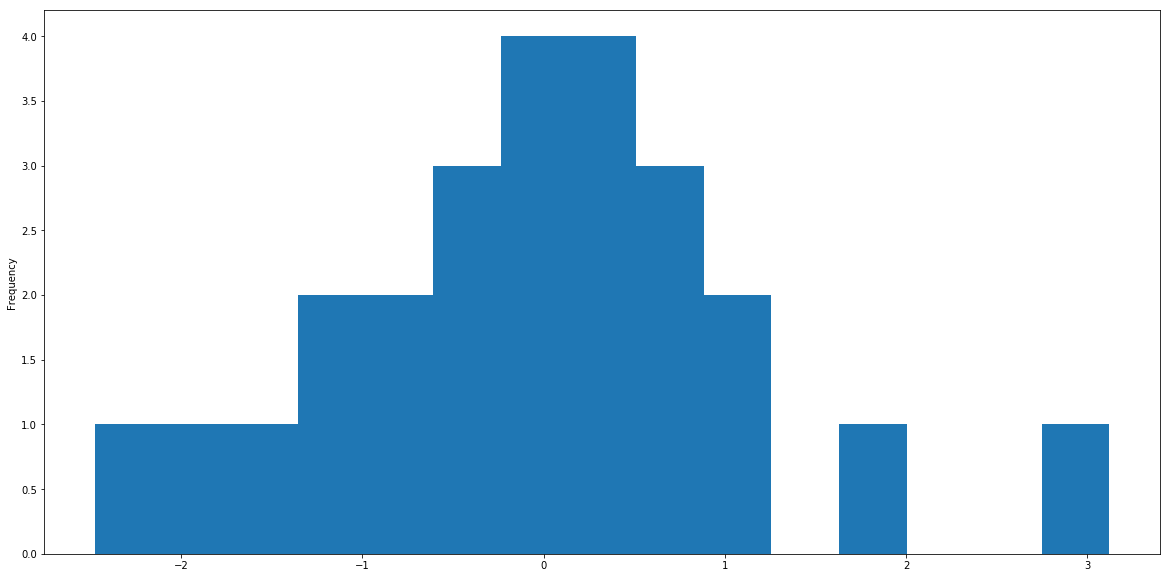

In [50]:
# At first glance, the deviance residuals don't look very normal. 
cell_df['deviance_resid'].plot(kind='hist', figsize=(20,10), bins=15)
# However, let's do more rigorous exploration.

In [51]:
#  Mean and standard deviation look reasonably close to the N(0,1) assumption.
cell_df['deviance_resid'].mean(), cell_df['deviance_resid'].std()

(-0.017752056270185543, 1.1578804609686681)

In [54]:
from scipy.stats import anderson

In [52]:
# Further, Anderson-Darling test fails to reject the null hypothesis of normality. 
# Thus, we conclude the model worked reasonably well :).
anderson(cell_df['deviance_resid'])

AndersonResult(statistic=0.27984918860828145, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))